In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv("train.csv", sep = ";")

In [2]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# About Data 

Data relate to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification objective is to predict whether the customer will subscribe to a time deposit (variable y).
The dataset contains 45,211 rows and 18 columns, sorted by date (May 2008 to November 2010).

# Data Visualization

## Numerical Elements of Data:

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [5]:
df['y'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

## Categorycal Elements of Data

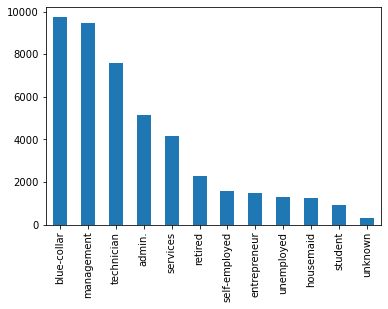

In [6]:
df["job"].value_counts().plot.bar();

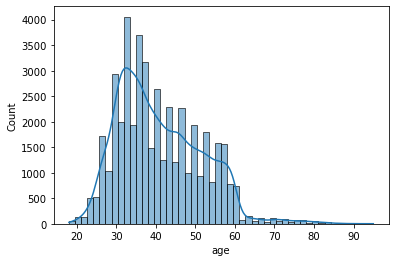

In [7]:
sns.histplot(df.age, bins = 50, kde = True);

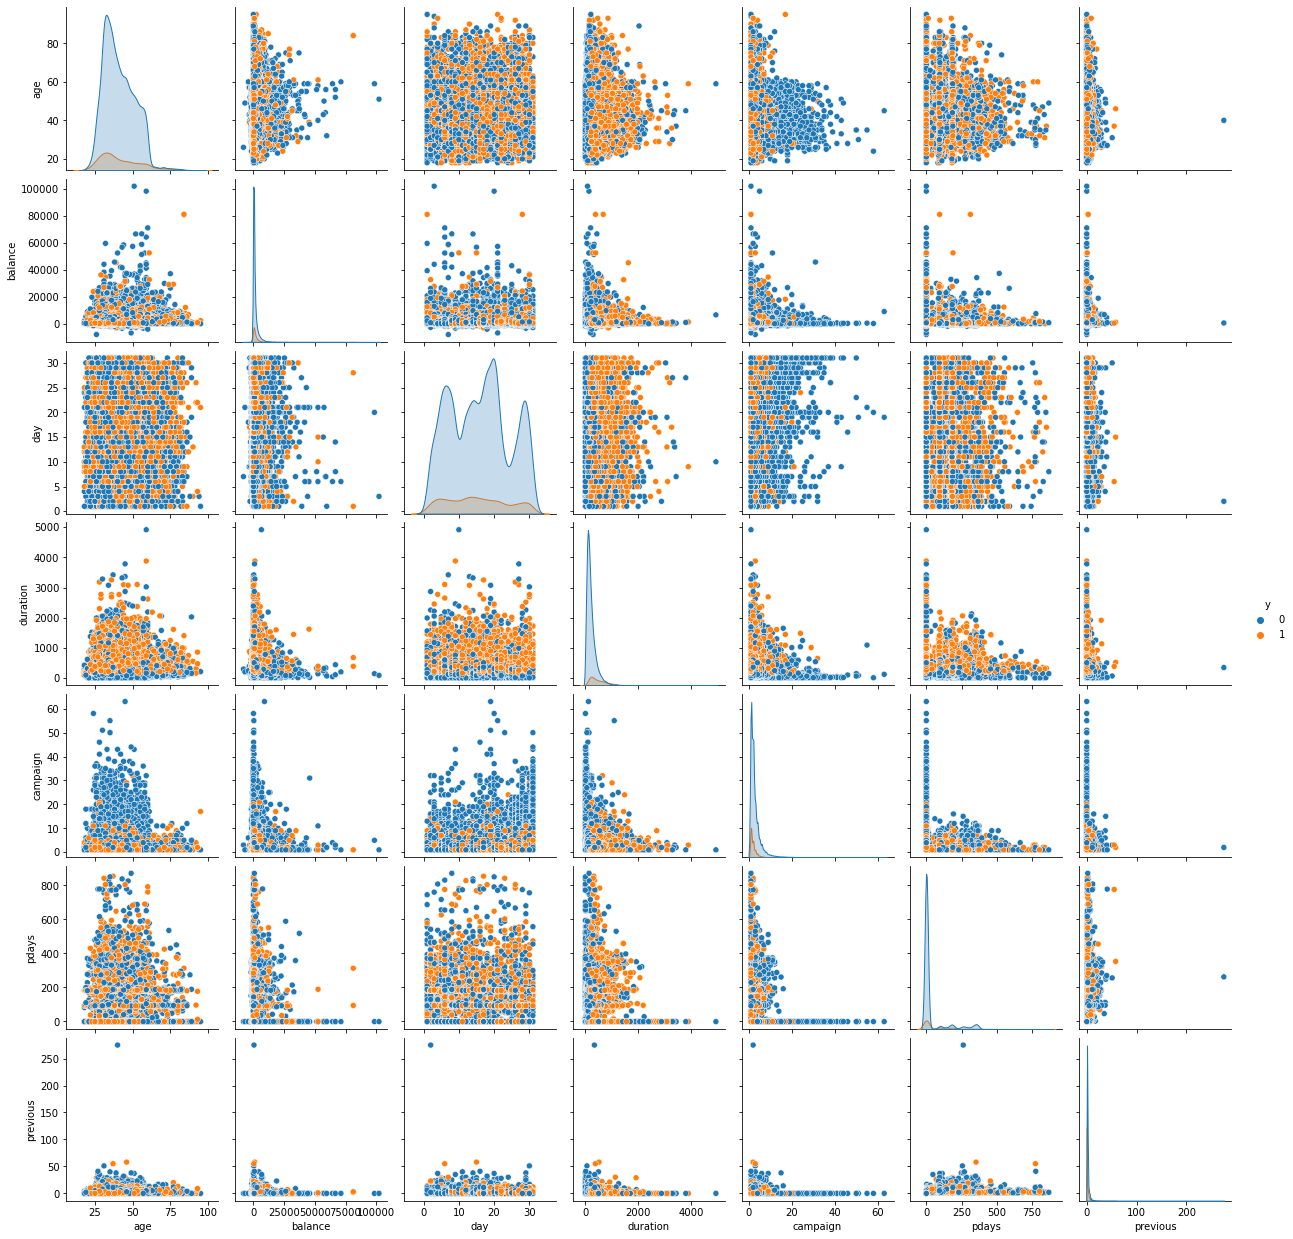

In [8]:
sns.pairplot(df, hue = "y" );

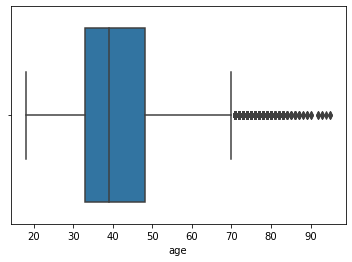

In [9]:
sns.boxplot(x=df["age"]);

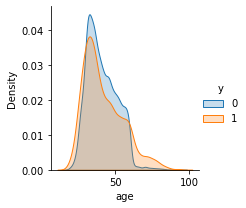

In [10]:
sns.FacetGrid(df, hue="y").map(sns.kdeplot, "age", shade=True).add_legend();

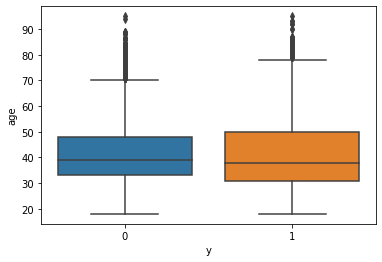

In [11]:
sns.boxplot(x="y", y="age", data=df);

In [12]:
import matplotlib.pyplot as plt

In [13]:
g1, g2 = 'job', 'y'
df1 = df.groupby(g1)[g2].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

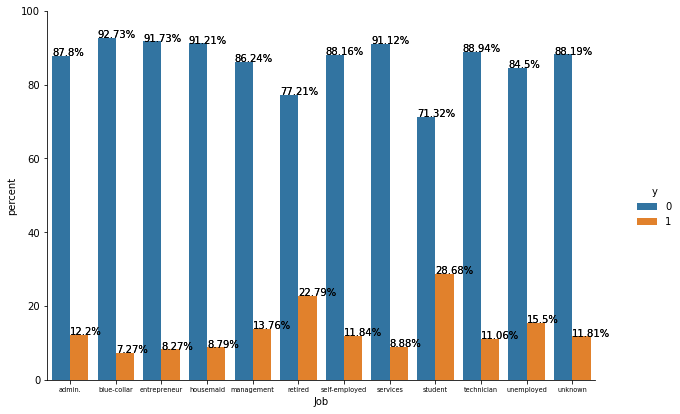

In [14]:
g = sns.catplot(x=g1,y='percent',hue=g2,kind='bar',data=df1)
g.figure.set_figheight(6)
g.figure.set_figwidth(10)
g.ax.set_ylim(0,100)
g.ax.set_xlabel('Job')

plt.xticks(fontsize='6.5')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    g.ax.text(txt_x,txt_y,txt)

In [15]:
k1, g2 = 'education', 'y'
df1 = df.groupby(k1)[g2].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

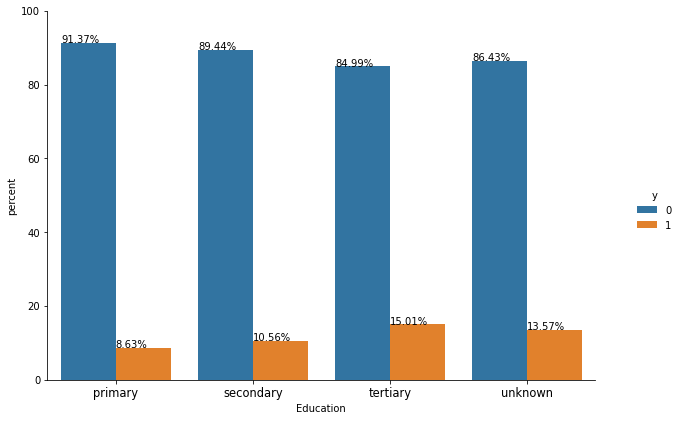

In [16]:
g = sns.catplot(x=k1,y='percent',hue=g2,kind='bar',data=df1)
g.figure.set_figheight(6)
g.figure.set_figwidth(10)
g.ax.set_ylim(0,100)
g.ax.set_xlabel('Education')

plt.xticks(fontsize='11.5')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [17]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Data Prep

In [18]:
df['contact'].replace(['unknown', 'cellular', 'telephone'],
                        [0, 1, 0], inplace=True)
df['housing'].replace(['no', 'yes'],
                        [0, 1], inplace=True)
df['default'].replace(['no', 'yes'],
                        [0, 1], inplace=True)
df['loan'].replace(['no', 'yes'],
                        [0, 1], inplace=True)
df['poutcome'].replace(['unknown', 'success', 'failure','other'],
                        [0, 1, 0, 0], inplace=True)

In [19]:
df['pdays'].replace([-1],[0], inplace=True) 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  int64 
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int64 
 16  y          45211 non-null  int64 
dtypes: int64(13), object(4)
memory usage: 5.9+ MB


In [21]:
new_df=df.drop(["job"], axis=1)
new_df=new_df.drop(["default"], axis=1)
new_df=new_df.drop(["education"], axis=1)
new_df=new_df.drop(["loan"], axis=1)
new_df=new_df.drop(["marital"], axis=1)
new_df=new_df.drop(["month"], axis=1)

(Removed the categorical elements from the data due to the low correlation.)

In [22]:
from sklearn import preprocessing

In [23]:
scaler1 = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = new_df.columns
d = scaler1.fit_transform(new_df)
scaled_df1 = pd.DataFrame(d, columns=names)
scaled_df1

,age,balance,housing,contact,day,duration,campaign,pdays,previous,poutcome,y
0,0.519481,0.092259,1.0,0.0,0.133333,0.053070,0.000000,0.000000,0.000000,0.0,0.0
1,0.337662,0.073067,1.0,0.0,0.133333,0.030704,0.000000,0.000000,0.000000,0.0,0.0
2,0.194805,0.072822,1.0,0.0,0.133333,0.015453,0.000000,0.000000,0.000000,0.0,0.0
3,0.376623,0.086476,1.0,0.0,0.133333,0.018707,0.000000,0.000000,0.000000,0.0,0.0
4,0.194805,0.072812,0.0,0.0,0.133333,0.040260,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.0,1.0,0.533333,0.198658,0.032258,0.000000,0.000000,0.0,1.0
45207,0.688312,0.088501,0.0,1.0,0.533333,0.092721,0.016129,0.000000,0.000000,0.0,1.0
45208,0.701299,0.124689,0.0,1.0,0.533333,0.229158,0.064516,0.211251,0.010909,1.0,1.0
45209,0.506494,0.078868,0.0,0.0,0.533333,0.103294,0.048387,0.000000,0.000000,0.0,0.0


<AxesSubplot:>

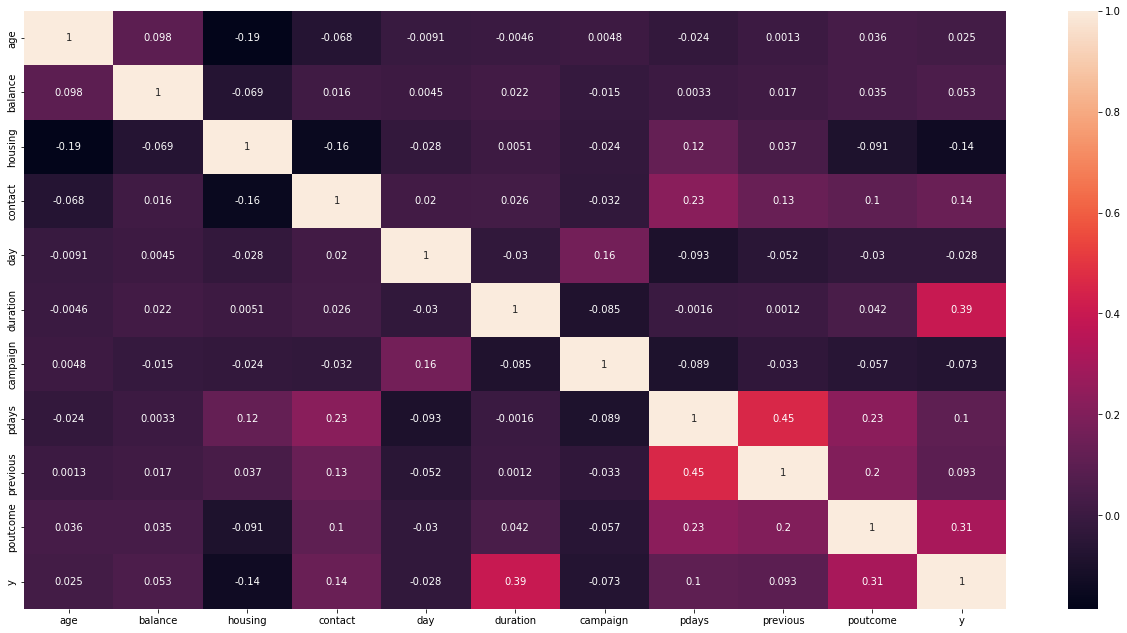

In [24]:
figure_size = (22, 11)  # birimi inç
fig, ax = plt.subplots(figsize=figure_size)
sns.heatmap(scaled_df1.corr(), ax=ax, annot=True)

# Train and Test

In [25]:
df1=scaled_df1.copy()
y = scaled_df1["y"]
X = scaled_df1.drop("y", axis=1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from warnings import filterwarnings
filterwarnings('ignore')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

# Models

In [30]:
print("before sampling,  '1': {}".format(sum(y_train == 1)))
print("before sampling,  '0': {}".format(sum(y_train == 0)))

before sampling,  '1': 3936
before sampling,  '0': 29972


In [31]:
def fit_and_score(models, X_train,X_test,y_train,y_test):
    for model in models:
        model.fit(X_train,y_train)
        y_preds=model.predict(X_test)
        print(model)
        print(classification_report(y_test,y_preds))
        print(' ')
rfc=RandomForestClassifier()
loj=LogisticRegression()
knn=KNeighborsClassifier()
svc=SVC()
cart=DecisionTreeClassifier()
models=[rfc,loj,knn,svc,cart]

In [32]:
fit_and_score(models,X_train,X_test,y_train,y_test)

RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      9950
         1.0       0.60      0.39      0.47      1353

    accuracy                           0.90     11303
   macro avg       0.76      0.68      0.71     11303
weighted avg       0.88      0.90      0.89     11303

 
LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      9950
         1.0       0.64      0.29      0.40      1353

    accuracy                           0.90     11303
   macro avg       0.78      0.63      0.67     11303
weighted avg       0.88      0.90      0.88     11303

 
KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      9950
         1.0       0.56      0.35      0.43      1353

    accuracy                           0.89     11303
   macro avg       0.74      0.66      0.69     11303
w

In [33]:
from imblearn.over_sampling import SMOTE
df_oversampled=scaled_df1.copy()
y=scaled_df1["y"]
X=scaled_df1.drop("y",axis=1)
oversmple=SMOTE()
X,y=oversmple.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [34]:
print('After OverSampling, train_X: {}'.format (X_train.shape))
print ('After oversapmling, the shape of train_y: {} \n'.format (y_train.shape))
print ("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print ("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

After OverSampling, train_X: (59883, 10)
After oversapmling, the shape of train_y: (59883,) 

After OverSampling, counts of label '1': 29972
After OverSampling, counts of label '0': 29911


In [35]:
fit_and_score(models,X_train,X_test,y_train,y_test)

RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93     10011
         1.0       0.92      0.94      0.93      9950

    accuracy                           0.93     19961
   macro avg       0.93      0.93      0.93     19961
weighted avg       0.93      0.93      0.93     19961

 
LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81     10011
         1.0       0.83      0.77      0.80      9950

    accuracy                           0.80     19961
   macro avg       0.81      0.80      0.80     19961
weighted avg       0.81      0.80      0.80     19961

 
KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89     10011
         1.0       0.85      0.98      0.91      9950

    accuracy                           0.90     19961
   macro avg       0.91      0.90      0.90     19961
w

In [1]:
pip install jupyterlab-github

Note: you may need to restart the kernel to use updated packages.


In [7]:
jupyterlab-server

NameError: name 'jupyterlab' is not defined